In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./result-multi-u.csv')
data.shape

(2400, 9)

In [3]:
data = data[data['uptime'] > 0] 
data

,rrt sampling,prm sampling,field width,field height,num mobiles,num statics,trial,uptime,elapsed time
0,500,0,600,600,20,0,#0,655365,0.097129
1,500,40,600,600,20,0,#0,655365,0.146297
2,500,0,600,600,20,0,#1,654390,0.116814
3,500,40,600,600,20,0,#1,621201,0.115515
4,500,0,600,600,20,0,#2,628448,0.070778
...,...,...,...,...,...,...,...,...,...
2395,500,40,600,600,40,40,#97,712155,0.541580
2396,500,0,600,600,40,40,#98,708096,0.459463
2397,500,40,600,600,40,40,#98,703345,0.498451
2398,500,0,600,600,40,40,#99,704518,0.612787


In [4]:
data_mean = data.drop(['trial'], axis=1).groupby(
  ['field width', 'field height', 'num mobiles', 'num statics', 'prm sampling'], as_index=False).mean()
data_mean

,field width,field height,num mobiles,num statics,prm sampling,rrt sampling,uptime,elapsed time
0,600,600,20,0,0,500.0,650537.76,0.096540
1,600,600,20,0,40,500.0,649336.26,0.096800
2,600,600,20,20,0,500.0,656859.45,0.096654
3,600,600,20,20,40,500.0,659542.46,0.100876
4,600,600,20,30,0,500.0,660281.11,0.103665
5,600,600,20,30,40,500.0,661433.80,0.103060
6,600,600,20,40,0,500.0,662445.51,0.100028
7,600,600,20,40,40,500.0,662163.25,0.101240
8,600,600,30,0,0,500.0,687621.30,0.302049
9,600,600,30,0,40,500.0,687675.40,0.301653


In [5]:
mean600p0 = data_mean.groupby(['field width', 'field height', 'prm sampling']).get_group((600, 600, 0))
mean600p40 = data_mean.groupby(['field width', 'field height', 'prm sampling']).get_group((600, 600, 40))

In [6]:
mean600p0

,field width,field height,num mobiles,num statics,prm sampling,rrt sampling,uptime,elapsed time
0,600,600,20,0,0,500.0,650537.76,0.096540
2,600,600,20,20,0,500.0,656859.45,0.096654
4,600,600,20,30,0,500.0,660281.11,0.103665
6,600,600,20,40,0,500.0,662445.51,0.100028
8,600,600,30,0,0,500.0,687621.30,0.302049
10,600,600,30,20,0,500.0,691814.70,0.292489
12,600,600,30,30,0,500.0,692216.81,0.286743
14,600,600,30,40,0,500.0,694099.01,0.313439
16,600,600,40,0,0,500.0,701927.06,0.563561
18,600,600,40,20,0,500.0,703586.71,0.547950


In [7]:
mean600p40

,field width,field height,num mobiles,num statics,prm sampling,rrt sampling,uptime,elapsed time
1,600,600,20,0,40,500.0,649336.26,0.096800
3,600,600,20,20,40,500.0,659542.46,0.100876
5,600,600,20,30,40,500.0,661433.80,0.103060
7,600,600,20,40,40,500.0,662163.25,0.101240
9,600,600,30,0,40,500.0,687675.40,0.301653
11,600,600,30,20,40,500.0,691031.97,0.299836
13,600,600,30,30,40,500.0,692537.13,0.295876
15,600,600,30,40,40,500.0,694142.62,0.318656
17,600,600,40,0,40,500.0,701857.21,0.569955
19,600,600,40,20,40,500.0,703762.08,0.563936


In [8]:
def plot_uptimes(data):
  uptimes = data['uptime'].values.reshape((3, 4)) / 3600
  num_mobiles= data['num mobiles'].values
  num_statics = data['num statics'].values

  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(111)
  ax.imshow(uptimes, cmap='GnBu')
  ax.set_xticks(np.arange(uptimes.shape[1]))
  ax.set_xticklabels(['0', '20', '30', '40'])
  ax.set_yticks(np.arange(uptimes.shape[0]))
  ax.set_yticklabels(['20', '30', '40'])
  ax.set_xlabel('Number of static sensors')
  ax.set_ylabel('Number of mobile sensors')
  ax.set_title('Uptime [hour]')
  
  for i in range(uptimes.shape[0]):
    for j in range(uptimes.shape[1]):
      ax.text(j, i, '{:.2f}'.format(uptimes[i][j]), ha='center', va='center', color='black')
  plt.show()

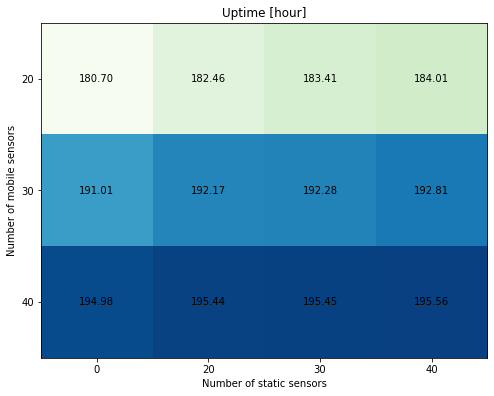

In [9]:
plot_uptimes(mean600p0)

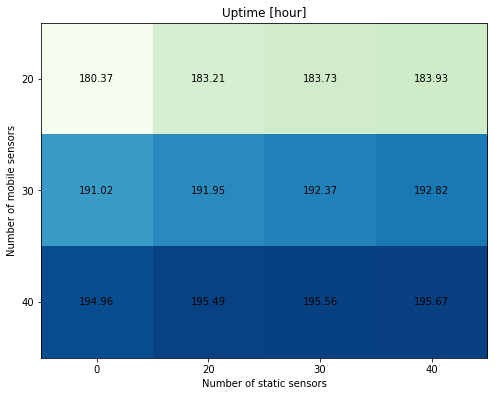

In [10]:
plot_uptimes(mean600p40)